## 不确定性越大，基尼系数越大

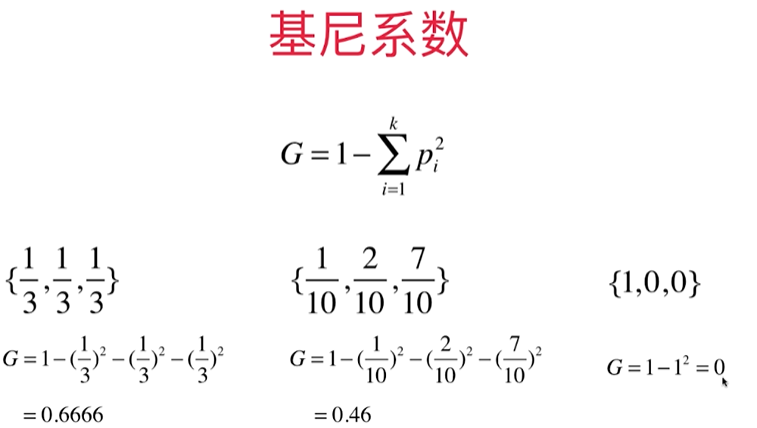

p为某一类的比例，k为类别数量

## 基尼熵

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def geni(p):
    return 1 - p**2

## 二分类基尼系数的变化情况

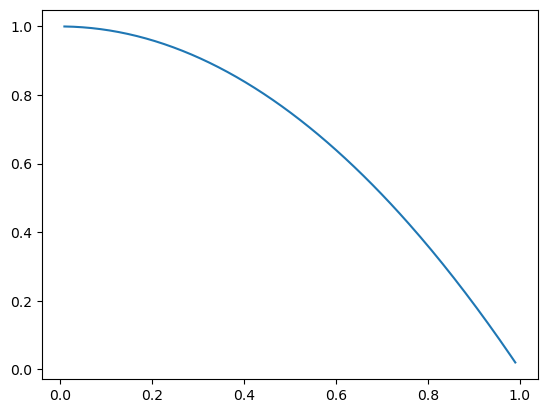

In [13]:
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, geni(x))
plt.show()

## 通过搜索找到基尼系数最小的点

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

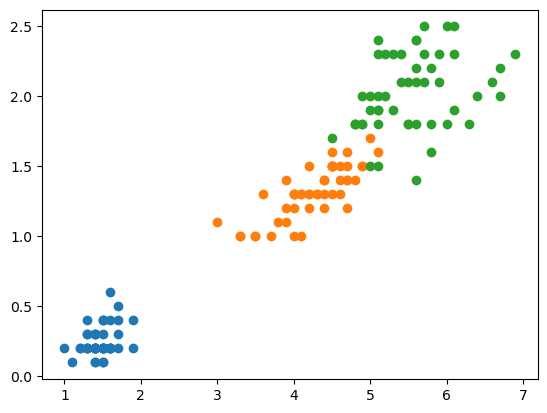

In [15]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [16]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                
    return best_g, best_d, best_v

In [17]:
best_g, best_d, best_v = try_split(X, y)
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.3333333333333333
best_d = 0
best_v = 2.45


In [18]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [19]:
gini(y1_l)

0.0

In [20]:
gini(y1_r)

0.5

In [21]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_g =", best_g2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_g = 0.1103059581320451
best_d = 1
best_v = 1.75


In [22]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [23]:
gini(y2_l)

0.1680384087791495

In [24]:
gini(y2_r)

0.04253308128544431